In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(open('E:/ML/decision_tree/car_evaluation.csv','rb'))

In [9]:
df.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [10]:
df.small.value_counts()

big      576
med      576
small    575
Name: small, dtype: int64

In [12]:
df['2'].value_counts()

3        432
5more    432
4        432
2        431
Name: 2, dtype: int64

In [13]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,3,more,big,med,unacc
freq,432,432,432,576,576,576,1209


In [60]:
col=df.columns
for i in col:
    print(df[i].value_counts())
col=list(col)
col.pop()

col

low      432
med      432
high     432
vhigh    431
Name: vhigh, dtype: int64
low      432
med      432
high     432
vhigh    431
Name: vhigh.1, dtype: int64
3        432
5more    432
4        432
2        431
Name: 2, dtype: int64
more    576
4       576
2       575
Name: 2.1, dtype: int64
big      576
med      576
small    575
Name: small, dtype: int64
med     576
high    576
low     575
Name: low, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64


['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low']

In [61]:
x=df.drop(['unacc'],axis=1)
y=df['unacc']
xdf=[]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
xdf=x.apply(LabelEncoder().fit_transform)
xd=pd.get_dummies(xdf,columns=col)
xd

,vhigh_0,vhigh_1,vhigh_2,vhigh_3,vhigh.1_0,vhigh.1_1,vhigh.1_2,vhigh.1_3,2_0,2_1,...,2_3,2.1_0,2.1_1,2.1_2,small_0,small_1,small_2,low_0,low_1,low_2
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=0.2)
xtrain

,vhigh_0,vhigh_1,vhigh_2,vhigh_3,vhigh.1_0,vhigh.1_1,vhigh.1_2,vhigh.1_3,2_0,2_1,...,2_3,2.1_0,2.1_1,2.1_2,small_0,small_1,small_2,low_0,low_1,low_2
1360,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1275,0,0,1,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
475,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
1488,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
335,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1160,0,0,1,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,0
416,0,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
806,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0


In [64]:
from sklearn.tree import DecisionTreeClassifier as dtc
model=dtc(criterion='gini')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
ypred=model.predict(xtest)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9710982658959537

In [68]:
xpred=model.predict(xtrain)
accuracy_score(ytrain,xpred)

1.0

In [70]:
model.score(xtrain,ytrain)

1.0

In [71]:
model.score(xtest,ytest)

0.9710982658959537

[Text(283.3894396551724, 210.192, 'X[12] <= 0.5\ngini = 0.468\nsamples = 1381\nvalue = [310, 58, 955, 58]'),
 Text(279.54116379310346, 195.696, 'X[19] <= 0.5\ngini = 0.591\nsamples = 917\nvalue = [310, 58, 491, 58]'),
 Text(275.6928879310345, 181.2, 'X[3] <= 0.5\ngini = 0.635\nsamples = 625\nvalue = [310, 58, 199, 58]'),
 Text(228.13060344827588, 166.704, 'X[7] <= 0.5\ngini = 0.637\nsamples = 467\nvalue = [249, 58, 102, 58]'),
 Text(173.41293103448277, 152.208, 'X[0] <= 0.5\ngini = 0.635\nsamples = 345\nvalue = [187, 58, 42, 58]'),
 Text(112.08103448275862, 137.712, 'X[20] <= 0.5\ngini = 0.686\nsamples = 240\nvalue = [105, 58, 19, 58]'),
 Text(56.28103448275862, 123.216, 'X[17] <= 0.5\ngini = 0.645\nsamples = 117\nvalue = [29, 25, 5, 58]'),
 Text(28.862068965517242, 108.72, 'X[4] <= 0.5\ngini = 0.432\nsamples = 80\nvalue = [15, 7, 0, 58]'),
 Text(11.544827586206896, 94.22399999999999, 'X[16] <= 0.5\ngini = 0.283\nsamples = 55\nvalue = [2, 7, 0, 46]'),
 Text(7.696551724137931, 79.727999

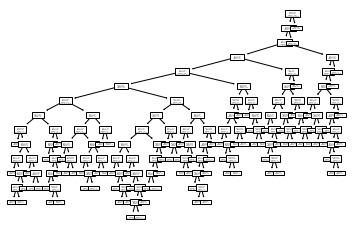

In [72]:
from sklearn import tree
tree.plot_tree(model.fit(xtrain,ytrain))

In [79]:
model1=dtc(criterion='entropy',max_depth=7)
model1.fit(xtrain,ytrain)
ypred1=model1.predict(xtest)

In [80]:
accuracy_score(ytest,ypred1)

0.9190751445086706

In [81]:
xpred1=model.predict(xtrain)

In [82]:
accuracy_score(ytrain,xpred1)

1.0

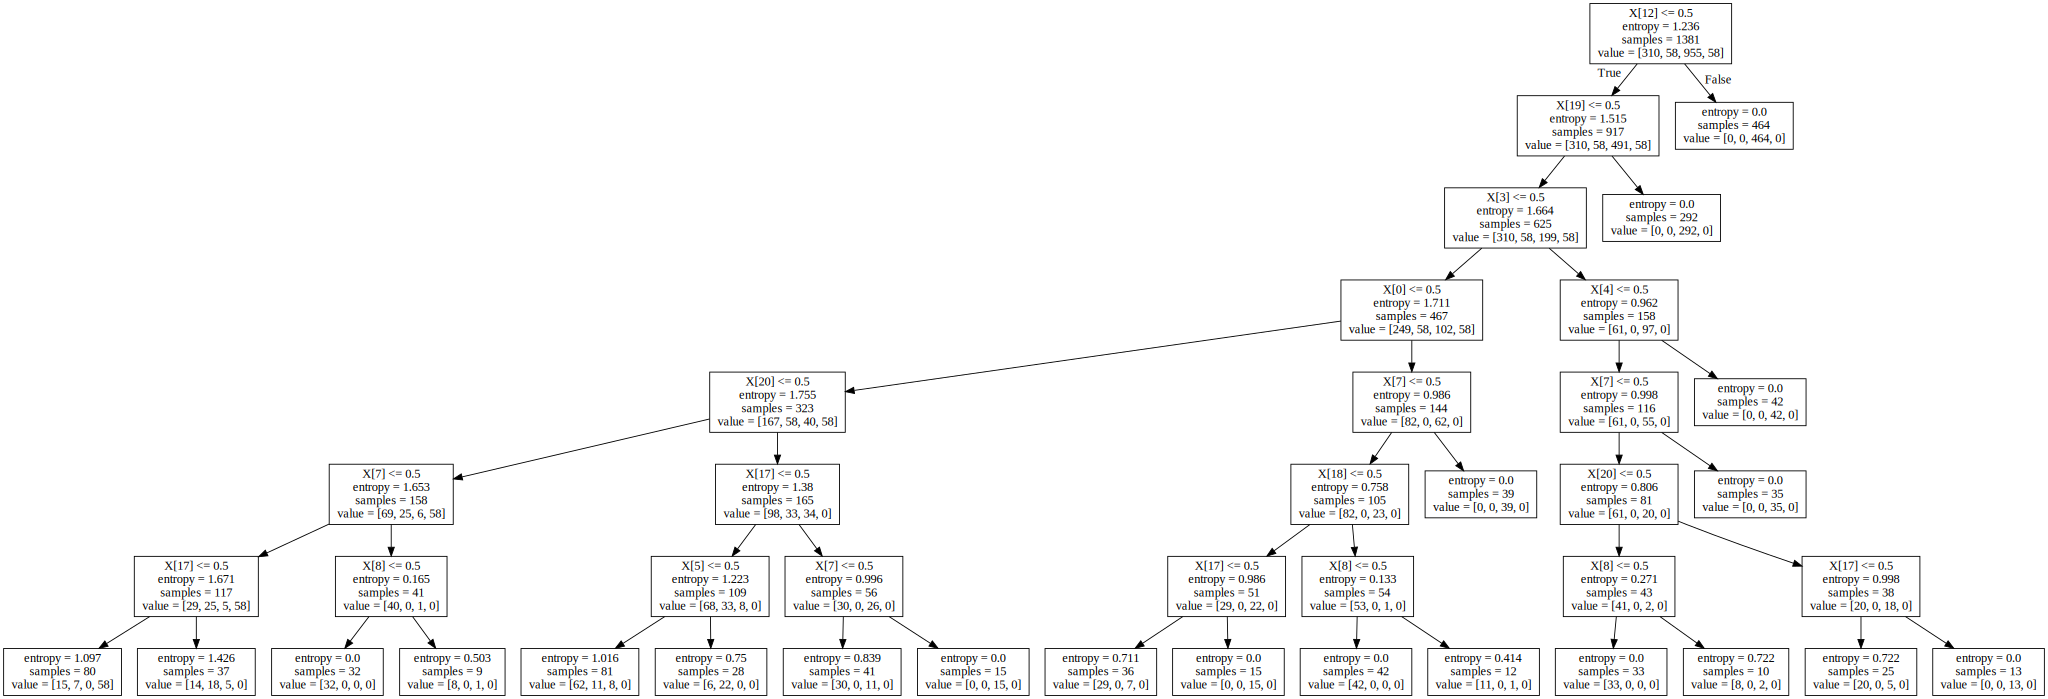

In [91]:
import graphviz
data=tree.export_graphviz(model1)
graph=graphviz.Source(data)
graph

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(ytest,ypred)
cm

array([[ 63,   0,  11,   0],
       [ 11,   0,   0,   0],
       [ 28,   0, 226,   0],
       [  7,   0,   0,   0]], dtype=int64)

In [94]:
cr=classification_report(ytest,ypred)
cr

E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         acc       0.58      0.85      0.69        74\n        good       0.00      0.00      0.00        11\n       unacc       0.95      0.89      0.92       254\n       vgood       0.00      0.00      0.00         7\n\n    accuracy                           0.84       346\n   macro avg       0.38      0.44      0.40       346\nweighted avg       0.82      0.84      0.82       346\n'